In [103]:
import random
import networkx as nx
import random
import matplotlib.pyplot as plt
from functools import lru_cache

def collect_nodes(points, highlighted_nodes=[], color='blue', highlighted_color='#79FF06', width=25,
                  highlighted_width=100):
    result = []
    for p in points:
        if p in highlighted_nodes:
            result.append((p, {"color": highlighted_color, "width": highlighted_width}))
        else:
            result.append((p, {"color": color, "width": width}))
    return result
    

def draw_graph(points, labels, dict_labels, highlighted_nodes=[], with_labels=False, 
               with_label_labels=False, node_color='green', label_color='black'):
    graph = nx.Graph()
    for label in labels:
        graph.add_edge(label[0],
                   label[1],
                   color=label[3],
                   width=3)
    args_points = collect_nodes(points, highlighted_nodes)
    graph.add_nodes_from(args_points)
    pos = nx.kamada_kawai_layout(graph)
    edges = graph.edges()
    nodes = graph.nodes()
    node_colors = [graph.nodes[n]['color'] for n in nodes]
    node_widths = [graph.nodes[n]['width'] for n in nodes]
    colors = [graph[e[0]][e[1]]['color'] for e in edges]
    widths = [graph[e[0]][e[1]]['width'] for e in edges]
    plt.figure(1,figsize=(10,10))
    nx.draw(graph, pos, edgelist=edges, edge_color=colors, node_color=node_colors, with_labels=with_labels,
            width=widths, node_size=node_widths)
    if with_label_labels:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=dict_labels)
    plt.show()

@lru_cache(maxsize=None)
def deikstra(a, b, labels, points):
    points = points[:]
    passed_nodes = [a]
    length_dict = {}
    for point in points:
        if point == a:
            length_dict[point] = 0
            continue
        length_dict[point] = float('inf')
    points = list(points)
    points.remove(a)
    points = tuple(points)
    
    while len(points) > 0:
        min_dist = float("inf")
        min_node = None
        for label in labels: 
            if label[0] in passed_nodes and label[1] in points:
                if min_dist > length_dict[label[0]] + label[2]:
                    min_dist = length_dict[label[0]] + label[2]
                    min_node = label[1]
        length_dict[min_node] = min_dist
        points = list(points)
        points.remove(min_node)
        points = tuple(points)
        passed_nodes.append(min_node)
    return length_dict[b]

def place_markets(points, labels, time, markets=[]):
    if not markets:
        first_market = random.choice(points)
        markets.append(first_market)
    i = 0
    while True:
        i += 1
        max_min_len = -1
        max_node = None
        for point in points:
            min_len = float('inf')
            for market in markets:
                length = deikstra(point, market, tuple(labels), tuple(points))
                if length < min_len:
                    min_len = length
            if max_min_len < min_len:
                max_min_len = min_len
                max_node = point
        print(f'Максимальное время доставки на итерации {i} -', max_min_len)
        if max_min_len <= time:
            print('Работа программы завершена успешно')
            break
        print(f'Условие доставки за {time} минут не выполнено, подождите еще...')
        markets.append(max_node)
    return markets
        
    

In [43]:
import csv

with open('metro.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file, delimiter=';')
    metro_labels = []
    metro_dict = {}
    stations = set()
    for row in data:
        metro_labels.append((row[0], row[1], int(row[2]), row[3]))
        metro_labels.append((row[1], row[0], int(row[2]), row[3]))
        metro_dict[(row[0], row[1])] = int(row[2])
        metro_dict[(row[1], row[0])] = int(row[2])
        stations = stations | {row[0], row[1]}
    stations = list(stations)

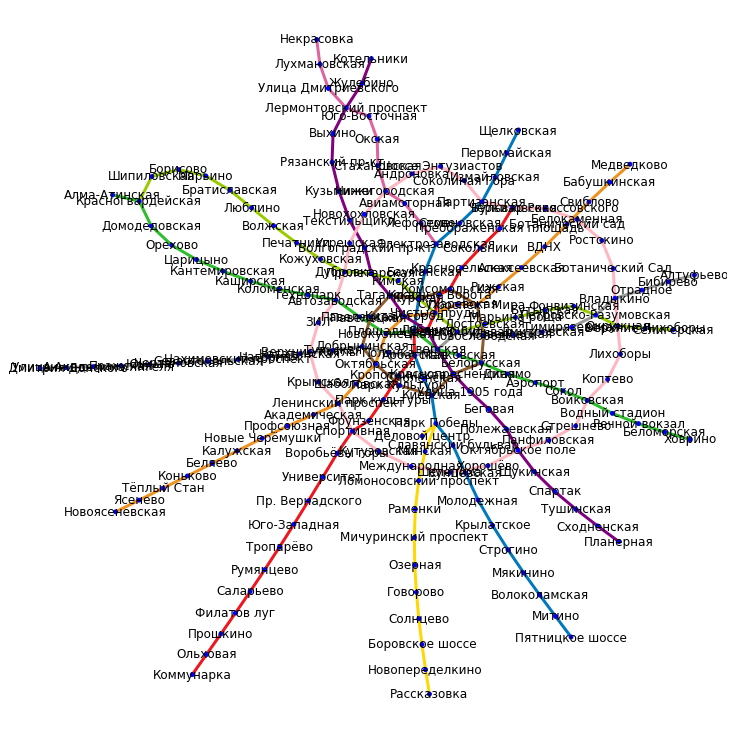

In [44]:
draw_graph(stations, metro_labels, metro_dict, with_labels=True)

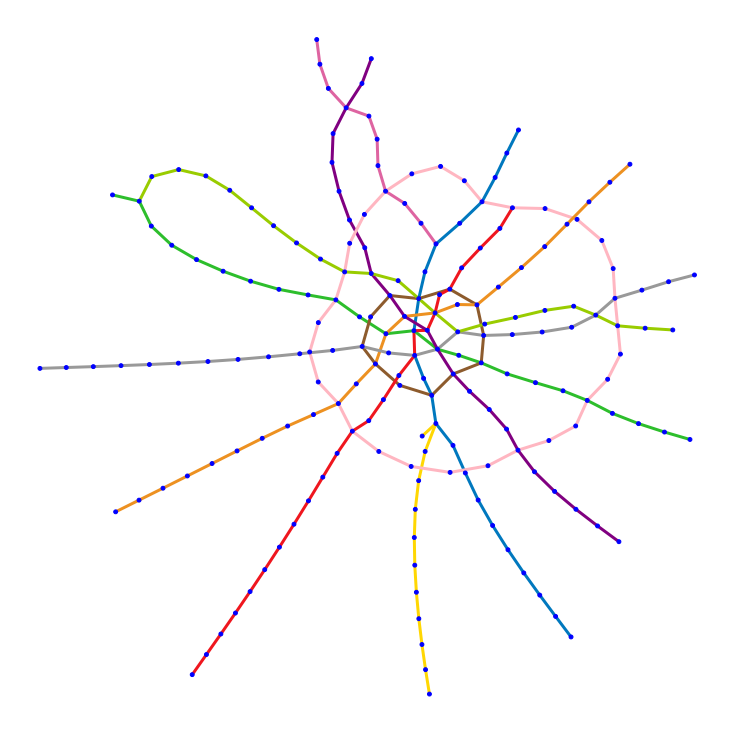

In [45]:
draw_graph(stations, metro_labels, metro_dict)

In [46]:
#Рандомно строим первый склад на одной из станций
first_market = random.choice(stations)
first_market

'Лихоборы'

In [107]:
#Получаем список станций, где должны быть склады
markets = place_markets(stations, metro_labels, 20, markets=[first_market])
print('Станции, на которых были построены склады -', ', '.join(markets))

Максимальное время доставки на итерации 1 - 64
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 2 - 58
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 3 - 58
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 4 - 56
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 5 - 55
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 6 - 53
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 7 - 53
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 8 - 34
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 9 - 33
Условие доставки за 20 минут не выполнено, подождите еще...
Максимальное время доставки на итерац

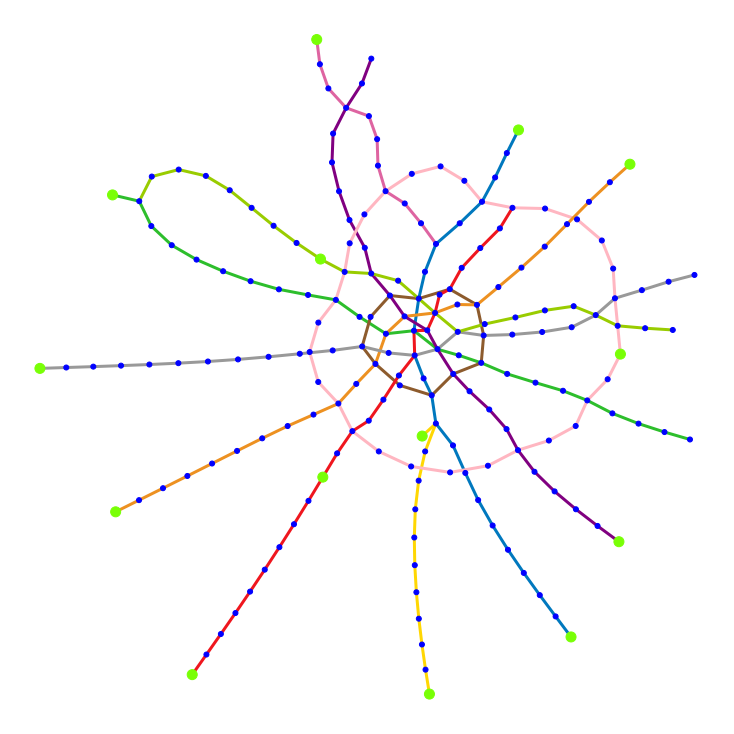

In [108]:
#Вывод графа с выделенными складами
draw_graph(stations, metro_labels, metro_dict, highlighted_nodes=markets)

In [109]:
#Пробуем время побольше
markets = place_markets(stations, metro_labels, 40, markets=[first_market])
print('Станции, на которых были построены склады -', ', '.join(markets))

Максимальное время доставки на итерации 1 - 64
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 2 - 58
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 3 - 58
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 4 - 56
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 5 - 55
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 6 - 53
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 7 - 53
Условие доставки за 40 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 8 - 34
Работа программы завершена успешно
Станции, на которых были построены склады - Лихоборы, Коммунарка, Алма-Атинская, Пятницкое шоссе, Рассказовка, Некрасовка, Бульвар Дмитрия Донского, Новоясеневская


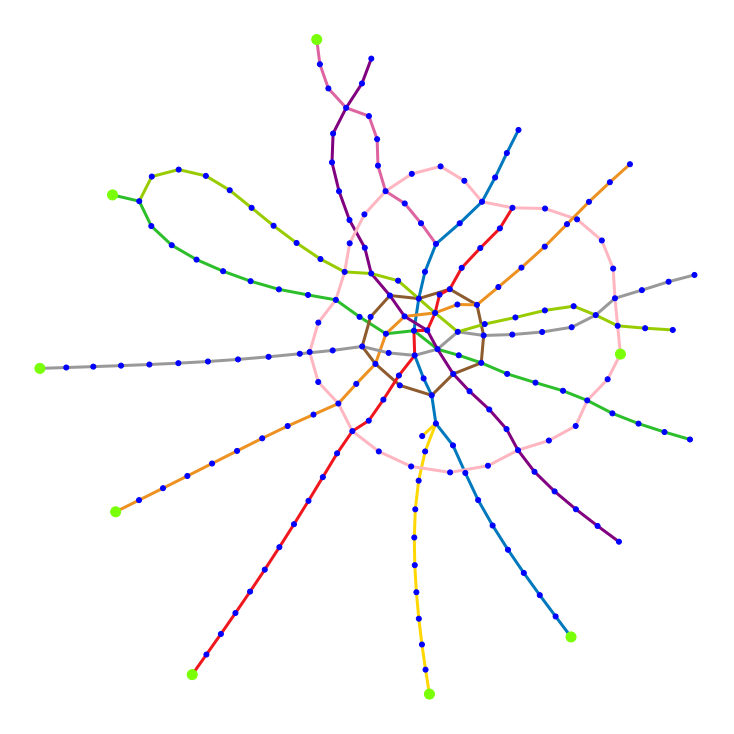

In [110]:
#Вывод графа с выделенными складами
draw_graph(stations, metro_labels, metro_dict, highlighted_nodes=markets)

In [105]:
#Пробуем время поменьше
markets = place_markets(stations, metro_labels, 10, markets=[first_market])
print('Станции, на которых были построены склады -', ', '.join(markets))

Максимальное время доставки на итерации 1 - 64
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 2 - 58
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 3 - 58
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 4 - 56
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 5 - 55
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 6 - 53
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 7 - 53
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 8 - 34
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерации 9 - 33
Условие доставки за 10 минут не выполнено, подождите еще...
Максимальное время доставки на итерац

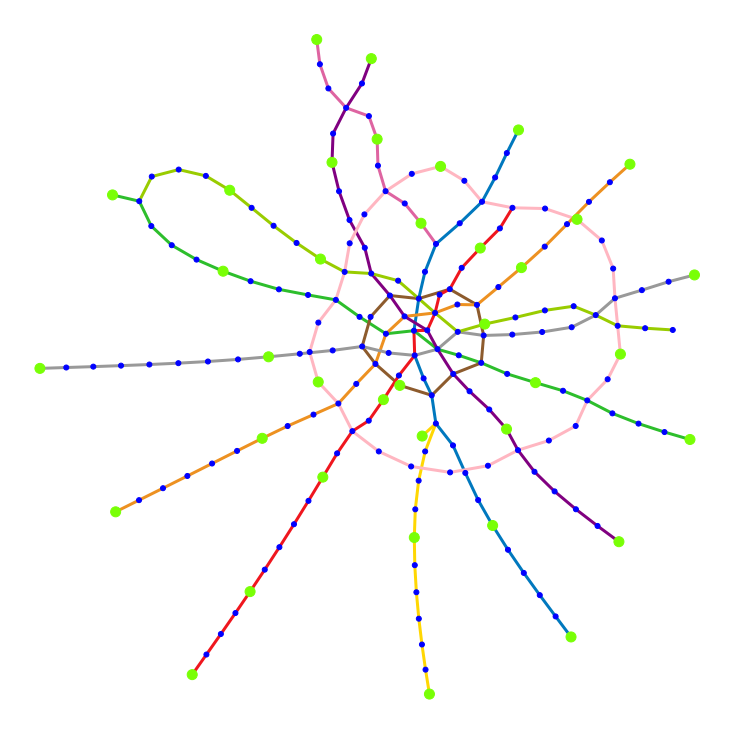

In [106]:
#Вывод графа с выделенными складами
draw_graph(stations, metro_labels, metro_dict, highlighted_nodes=markets)